# Normal Density Recovery using the COS Method

## Theory and Formulas

The COS method (Cosine expansion method) is an efficient technique for recovering probability density functions from their characteristic functions. It's based on the Fourier-cosine series expansion.

### Characteristic Function

The characteristic function of a random variable X is defined as:

$\phi_X(u) = E[e^{iuX}] = \int_{-\infty}^{\infty} e^{iux} f_X(x) dx$

where $f_X(x)$ is the probability density function of X.

For a normal distribution with mean $\mu$ and standard deviation $\sigma$, the characteristic function is:

$\phi_X(u) = e^{iu\mu - \frac{1}{2}\sigma^2u^2}$

### COS Method

The COS method approximates the density function as:

$f_X(x) \approx \sum_{k=0}^{N-1}{}' A_k \cos(k\pi \frac{x-a}{b-a})$

where:
- $[a,b]$ is the truncation range
- $N$ is the number of expansion terms
- $A_k$ are the Fourier-cosine series coefficients

The coefficients $A_k$ are approximated using the characteristic function:

$A_k \approx \frac{2}{b-a} \text{Re}\left\{\phi_X\left(\frac{k\pi}{b-a}\right) e^{-ika\pi/(b-a)}\right\}$

## Code Explanation

1. `COSDensity` function:
   - Calculates the Fourier-cosine coefficients using the characteristic function.
   - Computes the density approximation using these coefficients.

2. `mainCalculation` function:
   - Sets up the parameters for the normal distribution and the COS method.
   - Calculates the exact normal density and the COS approximations for different numbers of expansion terms.
   - Computes the maximum absolute error for each approximation.
   - Plots the results for comparison.

## Key Parameters

- `a` and `b`: Define the truncation range $[a,b]$.
- `N`: Number of expansion terms (varied in the example).
- `mu` and `sigma`: Mean and standard deviation of the normal distribution.

The code demonstrates how increasing the number of expansion terms improves the accuracy of the density recovery, as shown by the decreasing error values and the convergence of the plotted approximations to the exact density function.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [25]:
def COSDensity(cf, x, N, a, b):
    i = 1j  # Use 1j for imaginary unit
    k = np.arange(N)
    u = k * np.pi / (b - a)
    # Coefficient of characteristic function
    f_k = 2.0 / (b - a) * np.real(cf(u) * np.exp(-i * u * a))
    f_k[0] *= 0.5  # Adjust the first coefficient
    f_x = np.dot(f_k, np.cos(np.outer(u, x - a)))
    return f_x
    
    


For 4 expansion terms the error is 2.537378e-01
For 8 expansion terms the error is 1.075173e-01
For 16 expansion terms the error is 7.172378e-03
For 32 expansion terms the error is 4.032341e-07
For 64 expansion terms the error is 2.775558e-16


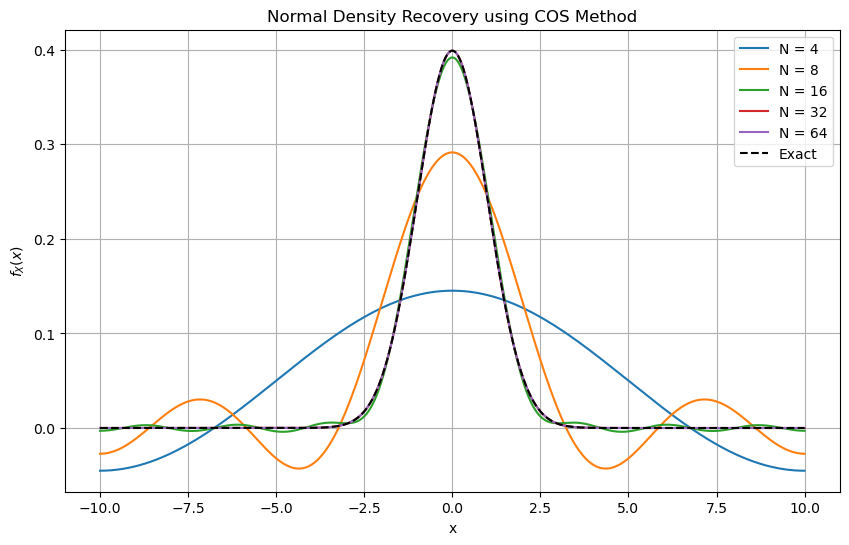

In [26]:

def mainCalculation():
    a = -10.0
    b = 10.0
    N_values = [2**x for x in range(2, 7)]
    # Setting for normal distribution
    mu = 0.0
    sigma = 1.0 
    # Define the characteristic function
    cF = lambda u: np.exp(1j * mu * u - 0.5 * sigma**2 * u**2)
    x = np.linspace(-10.0, 10, 1000)
    f_XExact = stats.norm.pdf(x, mu, sigma)
    
    plt.figure(figsize=(10, 6))
    plt.grid(True)
    plt.xlabel("x")
    plt.ylabel("$f_X(x)$")
    plt.title("Normal Density Recovery using COS Method")
    
    for n in N_values:
        f_X = COSDensity(cF, x, n, a, b)
        error = np.max(np.abs(f_X - f_XExact))
        print(f"For {n} expansion terms the error is {error:.6e}")
        
        plt.plot(x, f_X, label=f'N = {n}')
    
    plt.plot(x, f_XExact, 'k--', label='Exact')
    plt.legend()
    plt.show()

mainCalculation()